In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [2]:
color = ListedColormap(sns.color_palette('colorblind', 15).as_hex())
color = color(np.linspace(0, 1, 15))
color[10] = [1, 0, 0, 1]
sns.color_palette('colorblind', 15)

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784),
 (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844)]

In [3]:
SHAPES_ARRAY = ["circle-750.0", "triangle-900.0", "triangle_inverted-1220.0", "diamond-600.0", "diamond-915.0", "square-600.0", "rect-458.0-610.0", "rect-762.0-915.0", "rect-915.0-1220.0", "pentagon-915.0", "octagon-915.0", "other-0.0-0.0"]
RENAMED_SHAPES_ARRAY = ["Circle", "Triangle", "Upside-down triangle", "Diamond (S)", "Diamond (L)", "Square", "Rectangle (S)", "Rectangle (M)", "Rectangle (L)", "Pentagon", "Octagon", "Other"]

MARKERS = {
    "Circle": "-o",
    "Triangle": "-^",
    "Upside-down triangle": "-v",
    "Diamond (S)": "-d",
    "Diamond (L)": "-D",
    "Square": "-s",
    "Rectangle (S)": "-X",
    "Rectangle (M)": "-P",
    "Rectangle (L)": "-s",
    "Pentagon": "-p",
    "Octagon": "-8",
    "Avg.": "-.",
    "Weighted Avg.": "-*",
}


In [4]:
# read annotation csv
mapillary_vistas_annotation_path = '../mapillary_vistas_final_merged.csv'
mapillary_vistas_annotation_df = pd.read_csv(mapillary_vistas_annotation_path)
mapillary_vistas_annotation_df.shape

(31331, 27)

In [5]:
mapillary_vistas_annotation_df.head(3)

,filename,object_id,shape,predicted_shape,predicted_class,group_x,batch_number,row,column,new_class,...,tgt,alpha,beta,filename_png,xmin,ymin,xmin_ratio,ymin_ratio,tgt_final,tgt_polygon
0,--NSVcUgfVhFd6uzkqHOOg.jpg,48,diamond,diamond,diamond-600.0,1,0,0,a,NaN,...,"[[0.0, 66.0], [52.0, 3.0], [118.0, 53.0], [66....",0.392157,0.164706,--NSVcUgfVhFd6uzkqHOOg.png,3175,2133,0.648489,0.522794,"[[0.0, 66.0], [52.0, 3.0], [118.0, 53.0], [66....",NaN
1,--tczNya4_w5IhU9DeRMHw.jpg,33,diamond,diamond,diamond-915.0,1,0,0,b,NaN,...,"[[0.0, 163.0], [143.0, 21.0], [333.0, 149.0], ...",0.721569,0.047059,--tczNya4_w5IhU9DeRMHw.png,1410,1477,0.287990,0.362010,"[[0.0, 163.0], [143.0, 21.0], [333.0, 149.0], ...",NaN
2,-0QdotcnWZMgDLHELjMeoQ.jpg,117,diamond,diamond,diamond-915.0,1,0,0,c,NaN,...,"[[13.0, 34.0], [41.0, 0.0], [64.0, 43.0], [34....",0.772549,0.035294,-0QdotcnWZMgDLHELjMeoQ.png,2787,2514,0.569240,0.616176,"[[13.0, 34.0], [41.0, 0.0], [64.0, 43.0], [34....",NaN


In [12]:
mapillary_vistas_annotation_df['final_shape'].unique()

mapillary_vistas_annotation_df_non_other = mapillary_vistas_annotation_df[mapillary_vistas_annotation_df['final_shape'] != 'other-0.0-0.0']

In [13]:
mapillary_vistas_annotation_df_non_other.shape

(14651, 27)

In [14]:
# number of uniquely annotated images
mapillary_vistas_annotation_df_non_other.groupby(by=['filename']).count().reset_index().shape

(8433, 27)

In [6]:
# number of uniquely annotated images
mapillary_vistas_annotation_df.groupby(by=['filename']).count().reset_index().shape

(12457, 27)

In [7]:
# number of annotated signs per shape
num_annotation_per_shape_df = mapillary_vistas_annotation_df.groupby(by=['final_shape']).count().reset_index()[['final_shape', 'object_id']].rename(columns={'object_id': 'count'})
num_annotation_per_shape_df['class_label'] = num_annotation_per_shape_df['final_shape'].apply(lambda x: SHAPES_ARRAY.index(x))
num_annotation_per_shape_df = num_annotation_per_shape_df.sort_values(by=['class_label'], ascending=True)
num_annotation_per_shape_df['renamed_final_shape'] = num_annotation_per_shape_df['class_label'].apply(lambda x: RENAMED_SHAPES_ARRAY[x])
num_annotation_per_shape_df = num_annotation_per_shape_df[num_annotation_per_shape_df['final_shape'] != 'other-0.0-0.0']
num_annotation_per_shape_df

,final_shape,count,class_label,renamed_final_shape
0,circle-750.0,7972,0,Circle
10,triangle-900.0,637,1,Triangle
11,triangle_inverted-1220.0,825,2,Upside-down triangle
1,diamond-600.0,317,3,Diamond (S)
2,diamond-915.0,1435,4,Diamond (L)
9,square-600.0,1075,5,Square
6,rect-458.0-610.0,715,6,Rectangle (S)
7,rect-762.0-915.0,544,7,Rectangle (M)
8,rect-915.0-1220.0,361,8,Rectangle (L)
5,pentagon-915.0,133,9,Pentagon


In [8]:
num_annotation_per_shape_df.iloc[1]

final_shape            triangle-900.0
count                             637
class_label                         1
renamed_final_shape          Triangle
Name: 10, dtype: object

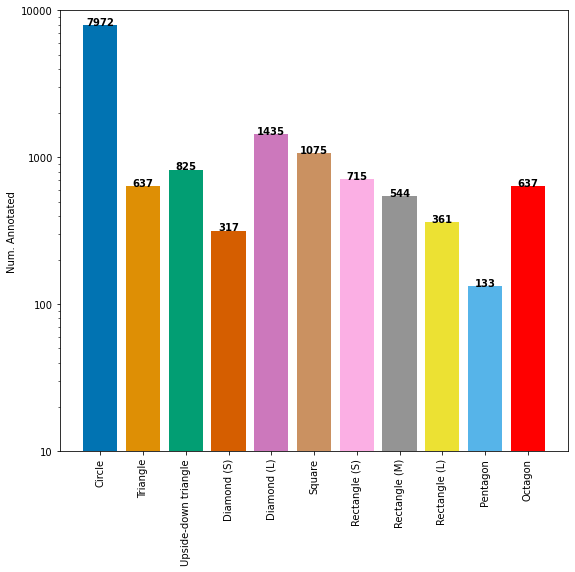

In [36]:
# plt.figure(figsize=(8, 8))
# plt.bar(num_annotation_per_shape_df['final_shape'], num_annotation_per_shape_df['count'])
# plt.xticks(RENAMED_SHAPES_ARRAY)
# fig.set_xticklabels(x_labels)

# fig, _ = plt.subplots(1, 1, figsize=(8, 8))
plt.figure(figsize=(8, 8))
# graph = plt.bar(num_annotation_per_shape_df['renamed_final_shape'], np.log(num_annotation_per_shape_df['count'].values), color=color)
graph = plt.bar(num_annotation_per_shape_df['renamed_final_shape'], num_annotation_per_shape_df['count'], color=color)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height,
             str(num_annotation_per_shape_df['count'].values[i]),
             ha='center',
             weight='bold')
    i+=1


# plt.ylim(0, int(max(num_annotation_per_shape_df['count'])*1.2))
plt.xticks(rotation=90)
plt.ylabel('Num. Annotated')
# plt.yticks(np.arange(0, 10000, 1000))
# plt.yscale('log')
plt.tight_layout()

import matplotlib.ticker
ax = plt.gca()
ax.set_yscale('log')
ax.set_yticks([10, 100, 1000, 10000])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())


# import matplotlib.ticker
# ax.set_yticks(np.arange(0, 10000, 1000))
# ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())


plt.savefig('../paper_figures/annotated_signs_count.png')
plt.show();


In [7]:
12457 + 2578 + 276

15311

In [8]:
# num images containing no traffic signs, train and val
2578 + 276
# num images in mapillary train and val
15422 + 1724

17146

In [9]:
mtsd_annotation_df = pd.read_csv('/datadrive/nab_126/data/mapillary_vistas/adv-patch-bench/traffic_sign_dimension_v6.csv')
mtsd_annotation_df.head()

,sign,count,id,shape,width_inches,height_inches,page,width_mm,height_mm,target,target_inches,no_confidence,notes,color
0,complementary--accident-area--g3,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,complementary--both-directions--g1,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,complementary--buses--g1,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,complementary--chevron-left--g1,1570,w1-8,rect,18.0,24.0,NaN,458.0,610.0,rect-458.0-610.0,rect-18.0-24.0,NaN,NaN,other
4,complementary--chevron-left--g2,266,NaN,rect,18.0,24.0,NaN,458.0,610.0,rect-458.0-610.0,rect-18.0-24.0,NaN,NaN,other


In [10]:
mtsd_annotation_df.groupby('target').count()

,sign,count,id,shape,width_inches,height_inches,page,width_mm,height_mm,target_inches,no_confidence,notes,color
target,,,,,,,,,,,,,
-1,3,3,3,3,0,0,0,0,0,3,0,0,0
circle-750.0,105,105,0,105,0,0,25,0,25,105,2,0,105
diamond-600.0,2,2,0,2,0,0,0,2,2,2,1,0,2
diamond-915.0,85,85,39,85,67,67,0,67,67,85,0,0,0
octagon-915.0,2,2,1,2,2,2,0,2,2,2,0,0,0
pentagon-915.0,1,1,1,1,1,1,0,1,1,1,0,0,0
rect-1067.0-762.0,1,1,1,1,1,1,0,1,1,1,0,0,0
rect-1220.0-1524.0,1,1,1,1,1,1,0,1,1,1,0,0,1
rect-1220.0-610.0,2,2,2,2,2,2,0,2,2,2,0,0,0
